In [3]:
import sys
sys.path.insert(0, "../")
from geolipi.symbolic import  *
from sympy import Symbol
from geolipi.languages.primal_csg3d import str_to_expr as primal_str_to_expr
from geolipi.languages.cp_fusion import str_to_expr as cp_str_to_expr
from geolipi.languages.macro_csg3d import str_to_expr as macro_str_to_expr
from geolipi.languages.lat_csg2d import str_to_expr as lat_str_to_expr2d
from geolipi.languages.macro_csg2d import str_to_expr as macro_str_to_expr2d
from geolipi.torch_compute.sketcher import Sketcher
from geolipi.torch_compute.evaluate_sdf import expr_to_sdf
from geolipi.torch_compute.evaluate_color import expr_to_colored_canvas
from geolipi.torch_compute.visualizer import get_figure
from geolipi.symbolic.utils import resolve_macros

import random
import torch as th
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

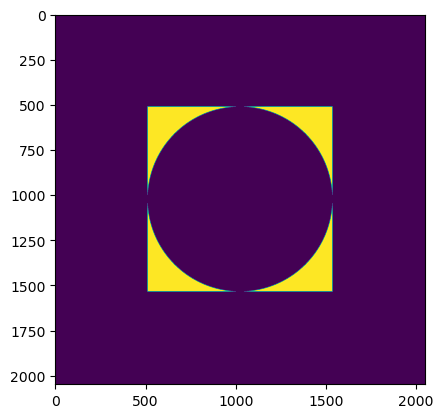

In [10]:
expr = Difference(NoParamRectangle2D(), NoParamCircle2D())
res = 2048
sketcher = Sketcher(device="cuda", resolution=res, n_dims=2)
sdf = expr_to_sdf(expr, sketcher=sketcher, rectify_transform=True)

sdf = sdf.cpu().numpy()
occ = sdf < 0
plt.imshow(occ.reshape(res, res, 1))

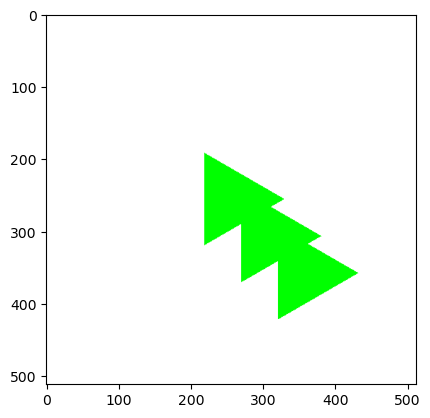

In [12]:

np_var = np.array([0.5])
variable = th.from_numpy(np_var).float().cuda()
expr = Scale2D(TriangleEquilateral2D(variable), th.tensor([0.5, 0.5], dtype=th.float32).cuda())
expr = ColorTree2D(TranslationSymmetry2D(expr, th.tensor([0.2, 0.2], dtype=th.float32).cuda(), 3), Symbol("GREEN"))
res = 512
sketcher = Sketcher(device="cuda", resolution=res, n_dims=2)
sdf = expr_to_colored_canvas(expr, sketcher=sketcher, rectify_transform=True)
sdf = sdf.cpu().numpy()
plt.imshow(sdf.reshape(res, res, 3))


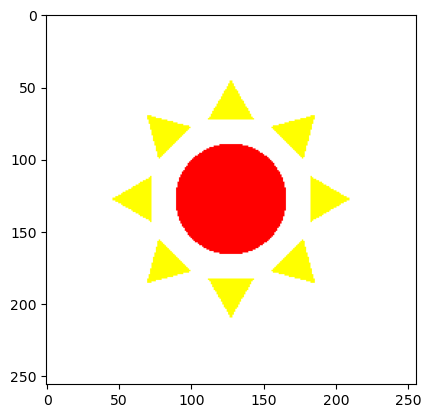

In [13]:

np_var = np.random.uniform(size=(3, 2))
np_var = np.array([[-0.5, -0.5],
                   [0.5, 0.0],
                   [-0.5, 0.5]])
variable = th.from_numpy(np_var).float().cuda()

expr = Triangle2D(variable)

np_var = np.random.uniform(size=(1))
np_var = np.array([0.5])
variable = th.from_numpy(np_var).float().cuda()

expr = Translate2D(TriangleEquilateral2D(variable), th.tensor([0.0, -0.2]).float().cuda())

expr = Translate2D(Scale2D(TriangleEquilateral2D(variable), th.tensor([0.25, 0.25], dtype=th.float32).cuda()),
                     th.tensor([-0.0, 0.5]).float().cuda())
# expr = EulerRotate2D(expr, th.tensor([0.1], dtype=th.float32).cuda())
expr = Union(ColorTree2D(RotationSymmetry2D(expr, th.tensor([np.pi/4], dtype=th.float32).cuda(), 8), Symbol("YELLOW")),
             ColorTree2D(Circle2D(th.tensor([0.3], dtype=th.float32).cuda()), Symbol("RED")))
# expr = resolve_macros(expr, device="cuda")
res = 256
sketcher = Sketcher(device="cuda", resolution=res, n_dims=2)

sdf = expr_to_colored_canvas(expr, sketcher=sketcher, rectify_transform=True)
sdf = sdf.cpu().numpy()
plt.imshow(sdf.reshape(res, res, 3))

Union(ColorTree2D(Scale2D(NoParamRectangle2D(), tensor_139646264640032), GREEN), Union(Translate2D(Scale2D(NoParamTriangle2D(), tensor_139650175079008), tensor_139647398945920), Union(Translate2D(Scale2D(NoParamRectangle2D(), tensor_139646233569184), tensor_139646233562384), Union(ColorTree2D(Translate2D(Scale2D(NoParamRectangle2D(), tensor_139646226420480), tensor_139646226425040), BLUE), Union(Scale2D(NoParamTriangle2D(), tensor_139646226430640), Union(ColorTree2D(RotationSymmetry2D(AxialReflect2D(Translate2D(Scale2D(NoParamCircle2D(), tensor_139646226423520), tensor_139646226422800), AX2D), tensor_139646226419840, 3), GREEN), Union(Scale2D(NoParamTriangle2D(), tensor_139646226417440), Scale2D(NoParamRectangle2D(), tensor_139646226422080))))))))

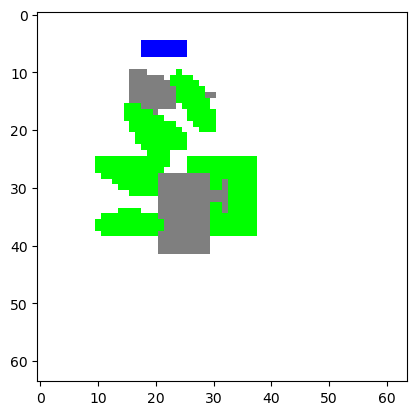

In [160]:

demo_file = "/home/aditya/projects/edit_vpi/ProgFixer/executors/data/toy_fix_train.txt"
expressions = open(demo_file, 'r').readlines()
# expressions = [x.strip().split("__") for x in expressions]
expressions = [x.strip().split(" ") for x in expressions]
expression = expressions[random.randint(0, len(expressions)-1)]

parsed_expr = cp_str_to_expr(expression, to_cuda=True)
parsed_expr
res = 64
sketcher = Sketcher(device="cuda", resolution=res, n_dims=2)

sdf = expr_to_colored_canvas(parsed_expr, sketcher=sketcher, rectify_transform=True)
sdf = sdf.cpu().numpy()
plt.imshow(sdf.reshape(res, res, 3))
parsed_expr

['difference', 'union', 'sphere(0.417169, -0.102310, 0.428646, 0.464924, 11.728302)', 'sphere(-0.253078, -0.513718, 0.461781, 0.668983, 36.111921)', 'union', 'cuboid(0.363882, 0.170032, 1.015763, 0.303527, -84.942905)', 'cuboid(-0.311201, 0.144791, 0.358798, 0.324805, 67.095184)']
Difference(Union(Translate2D(Scale2D(EulerRotate2D(NoParamCircle(), tensor_140325382197216), tensor_140325382196896), tensor_140325385499200), Translate2D(Scale2D(EulerRotate2D(NoParamCircle(), tensor_140324068140160), tensor_140324068139600), tensor_140324068139040)), Union(Translate2D(Scale2D(EulerRotate2D(NoParamRectangle(), tensor_140325383029040), tensor_140325383029520), tensor_140325383029920), Translate2D(Scale2D(EulerRotate2D(NoParamRectangle(), tensor_140324069391424), tensor_140324069391264), tensor_140324069385424)))


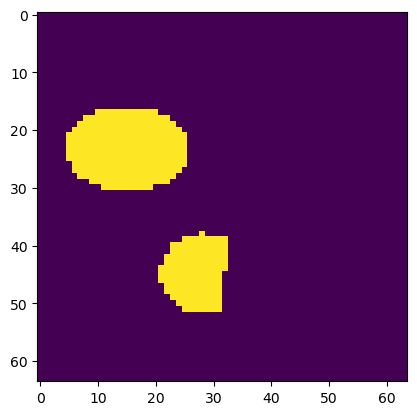

In [78]:
demo_file = "/media/aditya/DATA/data/synthetic_data/FCSG2D_data/synthetic/three_ops/expressions.txt"

expressions = open(demo_file, 'r').readlines()
expressions = [x.strip().split("__") for x in expressions]
x = random.choice(range(len(expressions)))
expression = expressions[x]
sketcher = Sketcher(device="cuda", resolution=64, n_dims=2)
print(expression)
parsed_expr = lat_str_to_expr2d(expression, to_cuda=True)
print(parsed_expr)
parsed_expr = resolve_macros(parsed_expr, device="cuda")

sdf = expr_to_sdf(parsed_expr, sketcher=sketcher, mode='naive', rectify_transform=True)
sdf = sdf.cpu().numpy()

plt.figure()
plt.imshow(sdf.reshape(64, 64)<=0)
# fig = get_figure(sdf, res=64)
# fig.show()


In [ ]:
demo_file = "/media/aditya/DATA/data/synthetic_data/PCSG3D_data/synthetic/three_ops/expressions.txt"

expressions = open(demo_file, 'r').readlines()
expressions = [x.strip().split("__") for x in expressions]
x = random.choice(range(len(expressions)))
expression = expressions[x]
sketcher = Sketcher(device="cuda", resolution=64, n_dims=2)
print(expression)
parsed_expr = primal_str_to_expr(expression, to_cuda=True)
print(parsed_expr)
parsed_expr = resolve_macros(parsed_expr, device="cuda")

sdf = expr_to_sdf(parsed_expr, sketcher=sketcher, mode='naive', rectify_transform=True)
sdf = sdf.cpu().numpy()

import matplotlib.pyplot as plt
plt.figure()
plt.imshow(sdf.reshape(64, 64)<=0)



['difference', 'intersection', 'translate(-0.331618, -0.285534)', 'cuboid', 'translate(0.011437, -0.291226)', 'cuboid', 'intersection', 'scale(0.286134, 0.499232)', 'cuboid', 'scale(0.943771, 0.413723)', 'cuboid']
Difference(Intersection(Translate2D(NoParamRectangle(), tensor_140324064864320), Translate2D(NoParamRectangle(), tensor_140324081759824)), Intersection(Scale2D(NoParamRectangle(), tensor_140324083061584), Scale2D(NoParamRectangle(), tensor_140323980933488)))


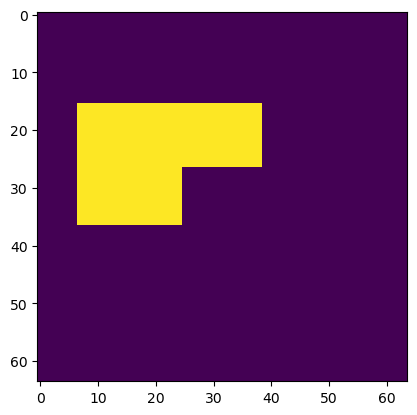

In [177]:
demo_file = "/media/aditya/DATA/data/synthetic_data/MCSG2D_data/synthetic/three_ops/expressions.txt"

expressions = open(demo_file, 'r').readlines()
expressions = [x.strip().split("__") for x in expressions]
x = random.choice(range(len(expressions)))
expression = expressions[x]
sketcher = Sketcher(device="cuda", resolution=64, n_dims=2)
print(expression)
parsed_expr = macro_str_to_expr2d(expression, to_cuda=True)
print(parsed_expr)
parsed_expr = resolve_macros(parsed_expr, device="cuda")

sdf = expr_to_sdf(parsed_expr, sketcher=sketcher, mode='naive', rectify_transform=True)
sdf = sdf.cpu().numpy()

fig = get_figure(sdf, res=64)
fig.show()

In [195]:
demo_file = "/media/aditya/DATA/data/synthetic_data/PCSG3D_data/synthetic/three_ops/expressions.txt"

expressions = open(demo_file, 'r').readlines()
expressions = [x.strip().split("__") for x in expressions]
x = random.choice(range(len(expressions)))
expression = expressions[x]
sketcher = Sketcher(device="cuda", resolution=64, n_dims=3)
print(expression)
parsed_expr = primal_str_to_expr(expression, to_cuda=True)
print(parsed_expr)
parsed_expr = resolve_macros(parsed_expr, device="cuda")

sdf = expr_to_sdf(parsed_expr, sketcher=sketcher, mode='naive', rectify_transform=True)
sdf = sdf.cpu().numpy()

fig = get_figure(sdf, res=64)
fig.show()

['difference', 'union', 'cuboid(-0.476245, -0.346412, 0.255594, 0.237761, 1.045208, 1.008980)', 'cuboid(0.183313, -0.110503, 0.170605, 0.741783, 0.592534, 0.880250)', 'union', 'cuboid(-0.266736, 0.127576, -0.398717, 0.920975, 0.685478, 0.552761)', 'cuboid(-0.122339, 0.229500, 0.509734, 1.024481, 0.488792, 0.834954)']
Difference(Union(Translate3D(Scale3D(NoParamCuboid(), tensor_140323991980448), tensor_140323991980688), Translate3D(Scale3D(NoParamCuboid(), tensor_140323991983328), tensor_140323991984208)), Union(Translate3D(Scale3D(NoParamCuboid(), tensor_140324769768896), tensor_140324769771376), Translate3D(Scale3D(NoParamCuboid(), tensor_140323990210336), tensor_140324061453008)))


In [198]:
demo_file = "/media/aditya/DATA/data/synthetic_data/MCSG3D_data/synthetic/three_ops/expressions.txt"

expressions = open(demo_file, 'r').readlines()
expressions = [x.strip().split("__") for x in expressions]
x = random.choice(range(len(expressions)))
expression = expressions[x]
sketcher = Sketcher(device="cuda", resolution=64, n_dims=3)
print(expression)
parsed_expr = macro_str_to_expr(expression, to_cuda=True)
print(parsed_expr)
parsed_expr = resolve_macros(parsed_expr, device="cuda")

sdf = expr_to_sdf(parsed_expr, sketcher=sketcher, mode='naive', rectify_transform=True)
sdf = sdf.cpu().numpy()

fig = get_figure(sdf, res=64)
fig.show()

['scale(1.059289, 0.608207, 0.504403)', 'union', 'union', 'cuboid', 'translate(-0.612415, -0.217694, 0.030202)', 'scale(0.497305, 1.143482, 0.896385)', 'cylinder', 'union', 'scale(0.542031, 0.498827, 1.509836)', 'cylinder', 'translate(0.170811, 0.001408, -0.139265)', 'rotate(-111.009384, 65.369503, -115.054749)', 'sphere']
Scale3D(Union(Union(NoParamCuboid(), Translate3D(Scale3D(NoParamCylinder(), tensor_140323956314880), tensor_140324769762256)), Union(Scale3D(NoParamCylinder(), tensor_140323956317200), Translate3D(EulerRotate3D(NoParamSphere(), tensor_140324076820000), tensor_140323988843040))), tensor_140323956319520)


In [6]:
parsed_expr

Union(Translate3D(Scale3D(NoParamCuboid(), tensor_139784184409968), tensor_139784085033408), Translate3D(Scale3D(NoParamCuboid(), tensor_139784085030688), tensor_139784085030848))

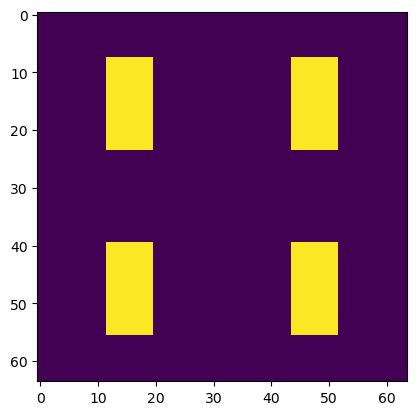

In [205]:

parsed_expr = Scale2D(
                ReflectX2D(
                    Translate2D(
                        ReflectY2D(
                            Translate2D(
                                Scale2D(NoParamRectangle(), 
                                (0.5, 0.25)), 
                            (0, 0.5))), 
                        (0.5, 0))),
                (1, 1))
parsed_expr = resolve_macros(parsed_expr, device="cuda")
# var_dict = {
#     'x': th.tensor((1, 1, 0.1), device="cuda"),
#     'y': th.tensor((0, 0, 0.8), device="cuda")
# }
# parsed_expr = Scale(Translate(Cuboid(), (0, 0, 1)), (1, 1, 1.0))
sketcher = Sketcher(device="cuda", resolution=64, n_dims=2)
sdf = expr_to_sdf(parsed_expr, sketcher=sketcher, mode='naive', rectify_transform=False)
sdf = sdf.cpu().numpy()
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(sdf.reshape(64, 64)<=0)

In [200]:

# parsed_expr = Scale(Translate(NoParamCuboid(), Symbol('y')), Symbol('x'))
# parsed_expr = Translate(Scale(NoParamCuboid(), Symbol('x')), Symbol('y'))
# parsed_expr = ['cuboid(0.1, 0.1, 0.5, 0.1, 0.1, 0.1)']
# parsed_expr= str_to_expr(parsed_expr, to_cuda=True)
parsed_expr = Scale3D(
                ReflectY3D(
                    Translate3D(
                        ReflectZ3D(
                            Translate3D(
                                Scale3D(NoParamCuboid(), 
                                (1, 0.5, 0.1)), 
                            (0.0, 0, 0.5))), 
                        (0.0, 0.5, 0))),
                (1.0, 0.25, 0.5))
parsed_expr = resolve_macros(parsed_expr, device="cuda")
# var_dict = {
#     'x': th.tensor((1, 1, 0.1), device="cuda"),
#     'y': th.tensor((0, 0, 0.8), device="cuda")
# }
# parsed_expr = Scale(Translate(Cuboid(), (0, 0, 1)), (1, 1, 1.0))
sketcher = Sketcher(device="cuda", resolution=64, n_dims=3)
sdf = expr_to_sdf(parsed_expr, sketcher=sketcher, mode='naive', rectify_transform=False)

sdf = sdf.cpu().numpy()

fig = get_figure(sdf, res=64)
fig.show()